In [1]:
#run at start of notebook, with fresh kernel
import os
default_path = os.getcwd()
print(default_path)

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis


# NBody Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingNBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
num_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    num_s.append(Num_stars)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 


In [ ]:
Analysis.pars_track(params,num_s)

In [ ]:
import numpy as np

p0 = []
p1 = []
p2 = []
p3 = []
for p in params:
    if len(p) >= 1: 
        p0.append(p[0])
        if len(p)>= 2:
            p1.append(p[1])
            if len(p)>= 3:
                p2.append(p[2])
                if len(p)>= 4:
                    p3.append(p[3])
                else:
                    p3.append(None)
            else:
                p2.append(None)
        else:
            p1.append(None)
    else:
        p0.append(None)

array1 = [[n,p] for n,p in zip(num_s,p0)]
array2 = [[n,p] for n,p in zip(num_s,p1)]
array3 = [[n,p] for n,p in zip(num_s,p2)]
array4 = [[n,p] for n,p in zip(num_s,p3)]
array1.sort()
array2.sort()
array3.sort()
array4.sort()
array1 = np.array(array1)
array2 = np.array(array2)
array3 = np.array(array3)
array4 = np.array(array4)

print(array1)
print(array2)
print(array3)
print(array4)

fig,ax = plt.subplots(1,4, figsize = (15,5))

ax[0].plot(array1[1:,0],array1[1:,1],"o--",color = "red")
ax[0].set_title("$a_0$")
ax[1].plot(array2[1:,0],array2[1:,1],"o--",color = "blue")
ax[1].set_title("$a_1$")
ax[2].plot(array3[1:,0],array3[1:,1],"o--",color = "green")
ax[2].set_title("$a_2$")
ax[3].plot(array4[1:,0],array4[1:,1],"o--",color = "orange")
ax[3].set_title("$a_3$")

plt.show()


In [ ]:
import numpy as np

array1 = [[n,z] for n,z in zip(num_s,z_rms_s)]
array2 = [[n,v] for n,v in zip(num_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Number of Particles")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Number of Particles")
plt.show()

# FDM Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)

    print(os.getcwd()) 


In [ ]:
import numpy as np

array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
plt.show()

# 50/50 FDM/NBody Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders  = ["FDM0.5_r0.014584958984941289_Snapshots","FDM0.5_r0.007292479492470644_Snapshots","FDM0.5_r0.003646239746235322_Snapshots","FDM0.5_r0.0007292479492470644_Snapshots"]
r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms, popt = Analysis.analysis(folder)
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

In [ ]:
Analysis.pars_track(params,r_s)

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

In [ ]:
import numpy as np

print("------------------------")
print("FDM")
array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()

print("---------------------")
print("PARTICLES")
array1 = [[r,z] for r,z in zip(r_s,z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()




# Isolated N-Body Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/NBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["50000ParticlesOnly_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

#### Equilibrium ICs

##### NBody Pure

In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/NBody_Pure" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Pure
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Pure/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '1419.7230441570282']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '9.327153662103973e-06']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '9.327153662103973e-06']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]


ValueError: not enough values to unpack (expected 6, got 5)

##### NBody Mixed


/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/SigmaRatio(199.0)_50000ParticlesOnly_Snapshots
[['Time Elapsed:' '2612.371344566345']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '9.327153662103973e-06']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.005']
 ['sigma1' '0.0009327153662103973']
 ['sigma2' '4.687011890504509e-06']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']
 ['Snapshot Indices:'
  '[    0    10    20    40    80   160   320   640  1280  2560  5120 10240]']]
[0.0, 10.0, 20.0, 40.0, 80.0, 160.0, 320.0, 640.0, 1280.0, 2560.0, 5120.0, 10240.0]
r=0.5,

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/Analysis.py:80: UserWarning: loadtxt: Empty input file: "K_star_fine_Energies.csv"
  K_fine_Energies = np.loadtxt("K_star_fine_Energies.csv", dtype = float,delimiter = ",")
/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/Analysis.py:81: UserWarning: loadtxt: Empty input file: "W_star_fine_Energies.csv"
  W_fine_Energies = np.loadtxt("W_star_fine_Energies.csv", dtype = float,delimiter = ",")
/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


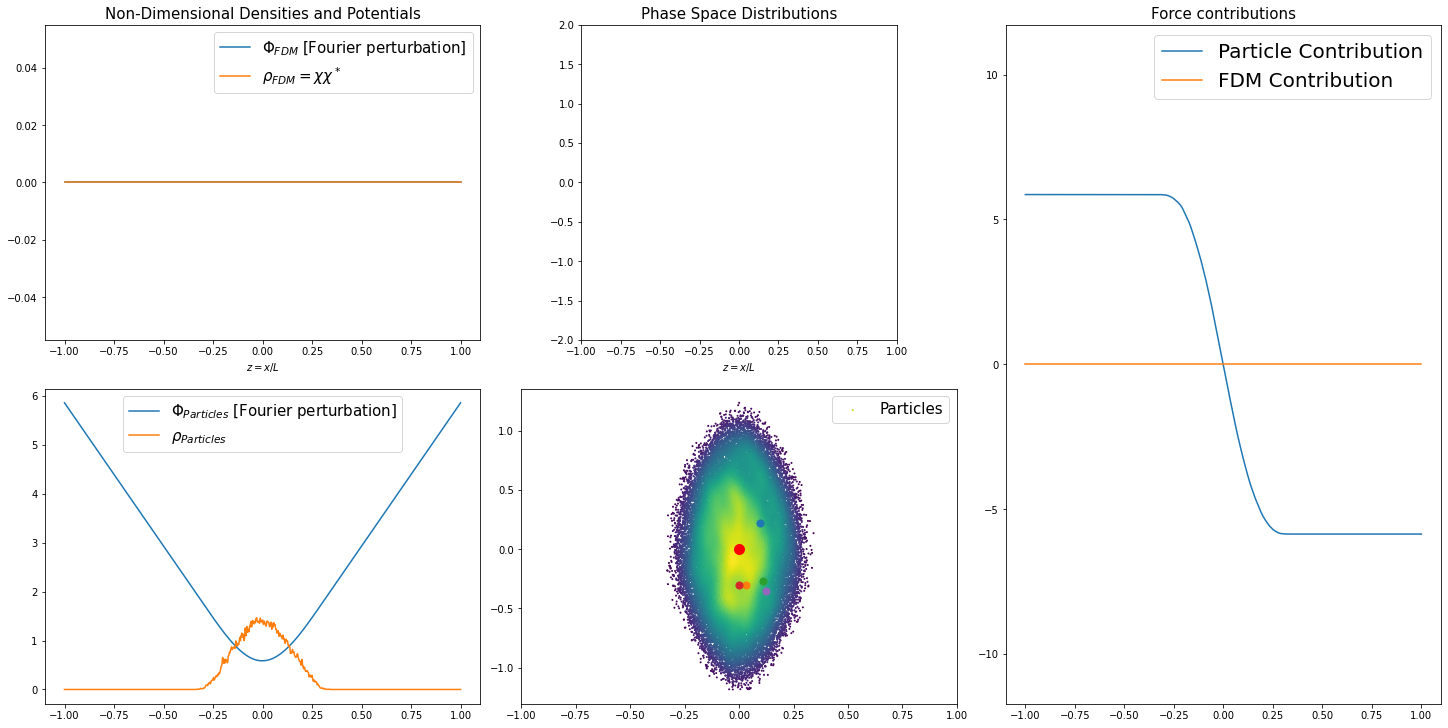

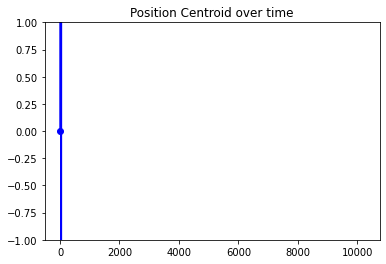

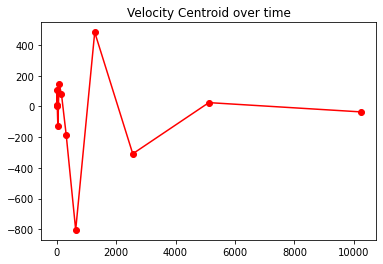

v_rms = 0.4692336980660968
z_rms = 0.1216468334198912
K_avg = 0.5*m*v_rms^2 = 1.0268275750508243e-06 (m=9.327153662103973e-06)
=> 2*K_avg = 2.0536551501016487e-06
W_avg = 6082.34167099456
---------Now Different Routine---------
K_tot = 0.05134137875254087
K_avg = 1.0268275750508174e-06
W_tot = -0.2732894196854962
W_avg = -5.465788393709924e-06


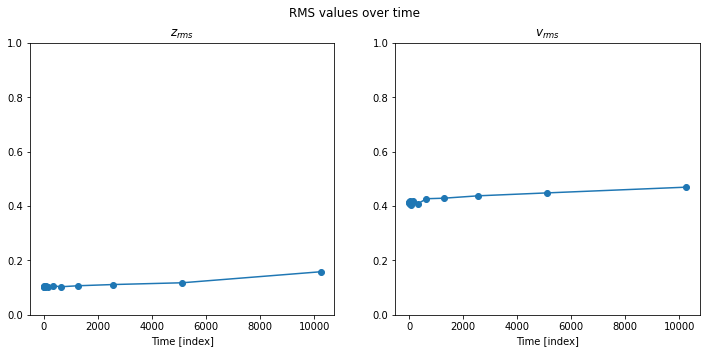

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:112: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


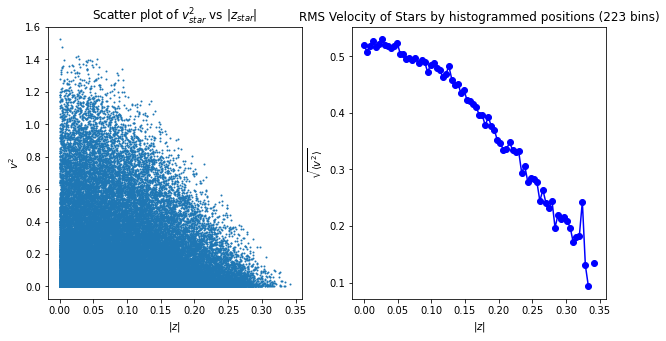

['True', 0.005, 0.0009327153662103973, 4.687011890504509e-06]
True
50000
250


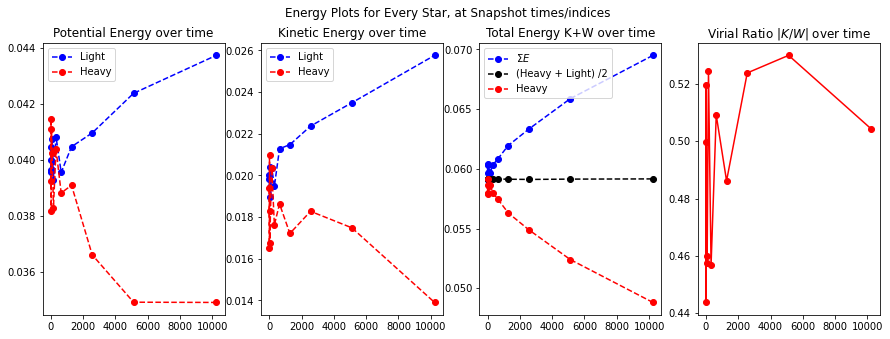

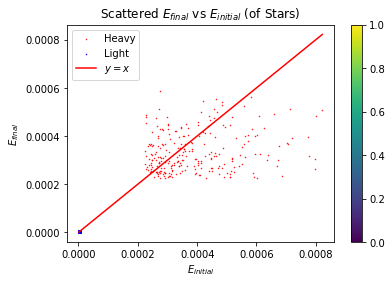

Net change in Energy (of all stars)= -0.00014125879968987374


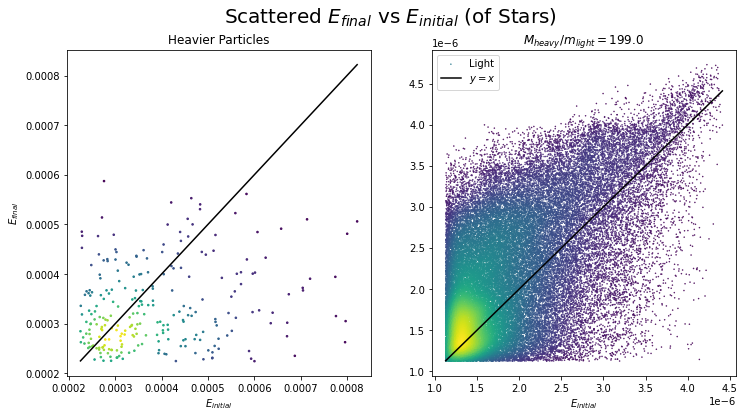

Net change in Energy = 0.01402851914076132
Net change in Energy = 0.01402851914076132


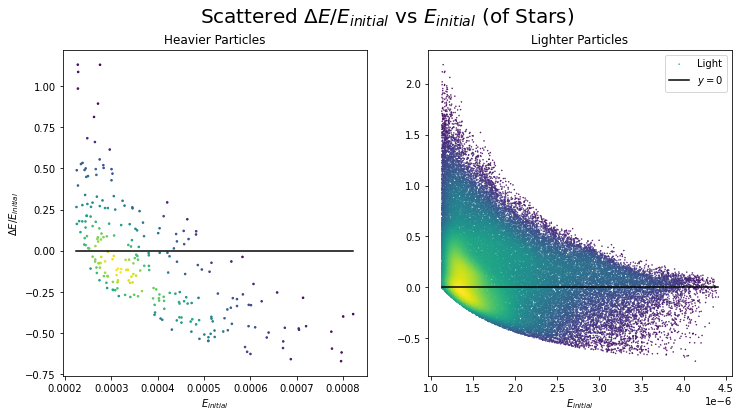

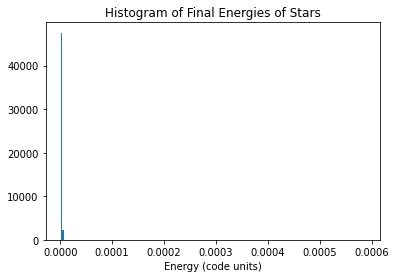

0.0009327153662103973 4.687011890504509e-06
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/SigmaRatio(199.0)_50000ParticlesOnly_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/SigmaRatio(99.0)_50000ParticlesOnly_Snapshots
[['Time Elapsed:' '2601.68408370018']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '9.327153662103973e-06']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.01']
 ['sigma1' '0.00046635768310519863']
 ['sigma2' '4.710683667729279e-06']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']
 ['Snapshot Indices:'
  '[    0    10    20    40    80   160   320   640  1280  2560  5120 10240]']]
[0.0, 10.0, 20.0, 40.0, 80.0, 160.0, 320.0, 640.0, 1280.0, 2560.0, 5120.0, 10240.0]
r=0.5,Num_stars = 50000.0


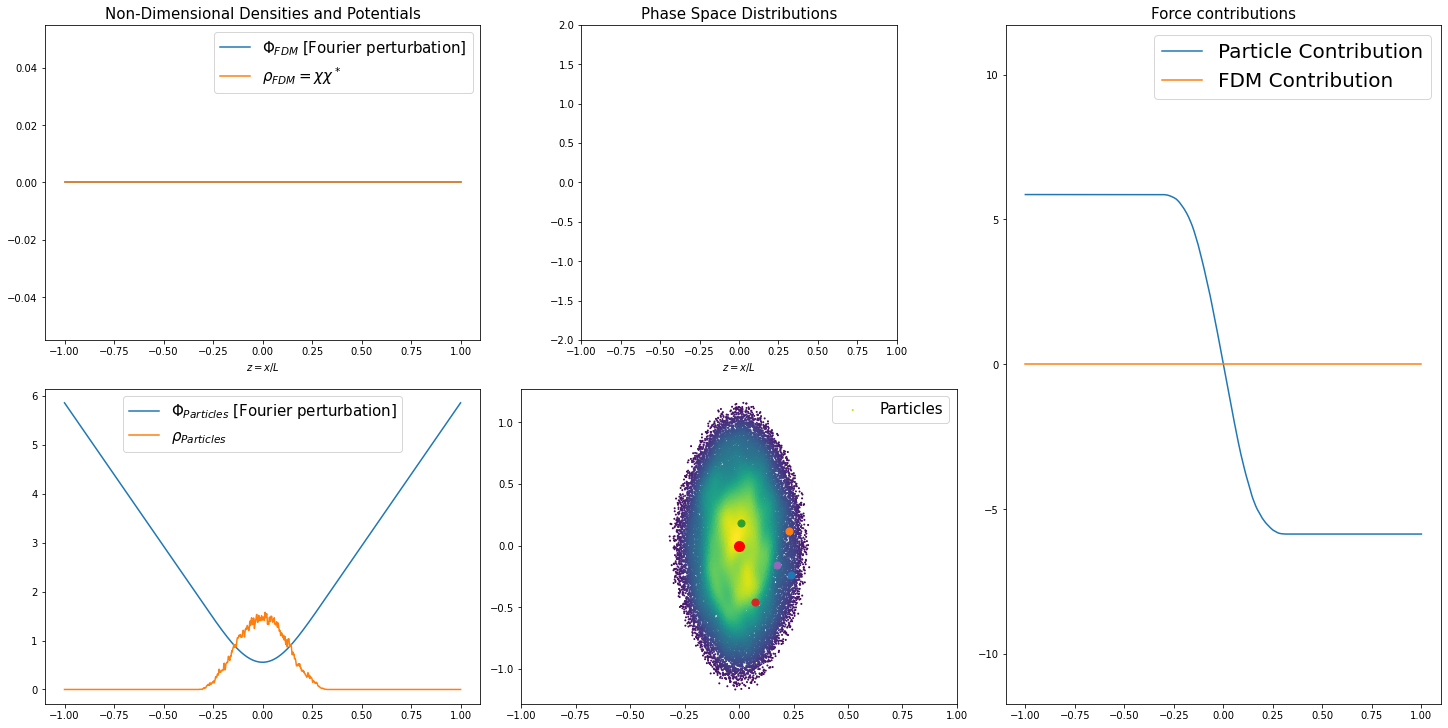

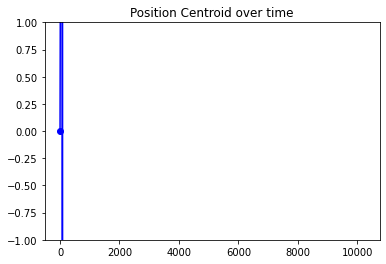

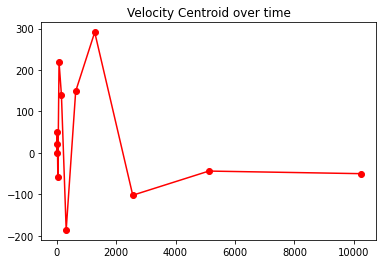

v_rms = 0.4523882229295189
z_rms = 0.11585913168037835
K_avg = 0.5*m*v_rms^2 = 9.544248025150412e-07 (m=9.327153662103973e-06)
=> 2*K_avg = 1.9088496050300825e-06
W_avg = 5792.956584018918
---------Now Different Routine---------
K_tot = 0.04772124012575224
K_avg = 9.544248025150448e-07
W_tot = -0.2593259121972732
W_avg = -5.186518243945464e-06


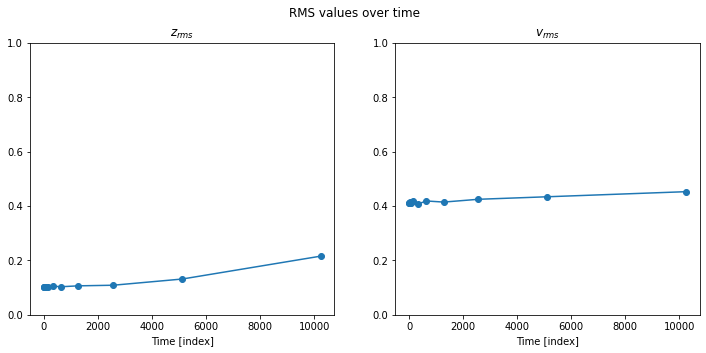

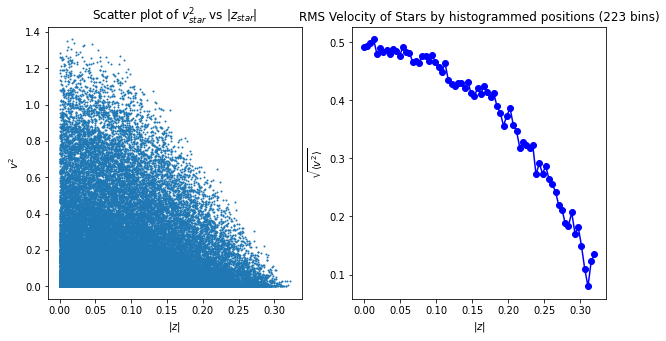

['True', 0.01, 0.00046635768310519863, 4.710683667729279e-06]
True
50000
500


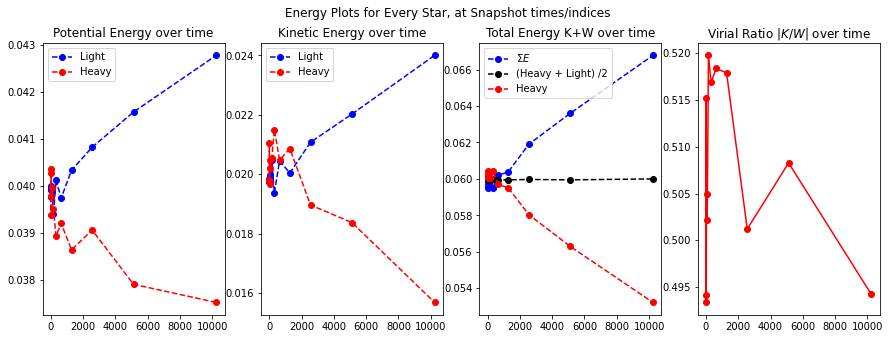

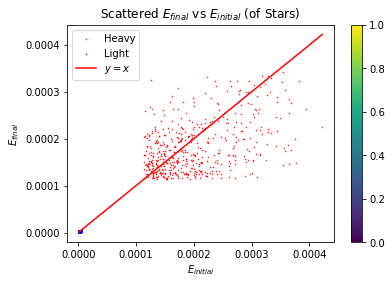

Net change in Energy (of all stars)= 6.80630237059058e-05


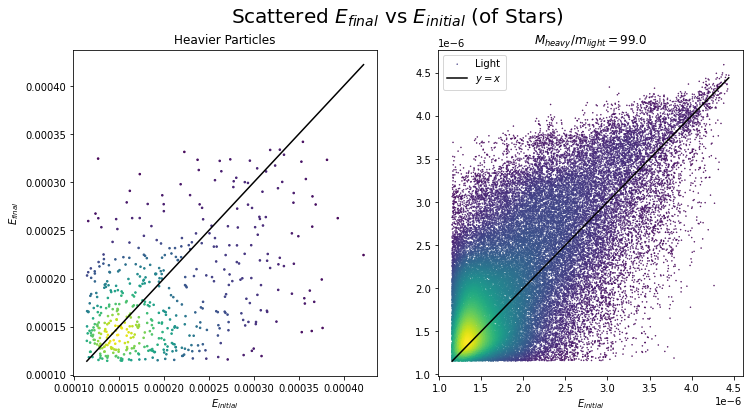

Net change in Energy = 0.009710700268369213
Net change in Energy = 0.009710700268369213


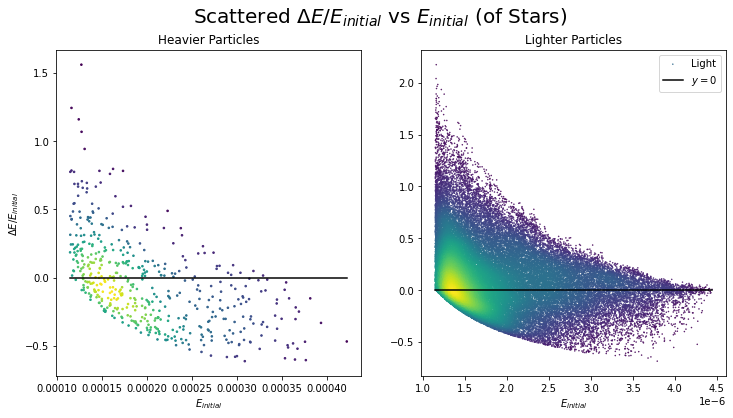

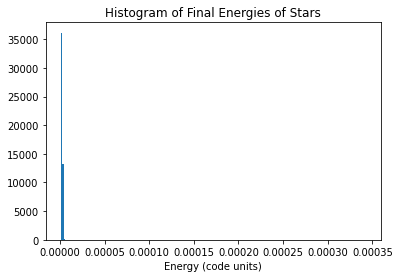

0.00046635768310519863 4.710683667729279e-06
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/SigmaRatio(99.0)_50000ParticlesOnly_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/SigmaRatio(300.2048192771084)_50000ParticlesOnly_Snapshots


OSError: Properties.csv not found.

In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/NBody_Mixed" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
# folders = [ #"SigmaRatio(19.0)_50000ParticlesOnly_Snapshots", 
#     "SigmaRatio(48.99999999999999)_50000ParticlesOnly_Snapshots",
#     "SigmaRatio(99.0)_50000ParticlesOnly_Snapshots",
#      "SigmaRatio(199.0)_50000ParticlesOnly_Snapshots",
#      "SigmaRatio(300.2048192771084)_50000ParticlesOnly_Snapshots",
#      "SigmaRatio(399.0)_50000ParticlesOnly_Snapshots"]
mass_ratios = []
deltaE_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    mass_ratio, deltaE = Analysis.analysis(folder,type='Isolated')
    
    mass_ratios.append(mass_ratio)
    deltaE_s.append(deltaE)
    
    print(os.getcwd()) 

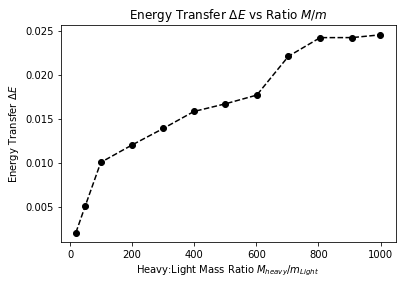

In [12]:
import numpy as np
data = np.array([[m,dE] for m,dE in zip(mass_ratios,deltaE_s)])
data.sort(axis = 0)
plt.plot(data[:,0],data[:,1], 'o--', c = 'black')
plt.title("Energy Transfer $\\Delta E$ vs Ratio $M/m$")
plt.xlabel("Heavy:Light Mass Ratio $M_{heavy}/m_{Light}$")
plt.ylabel("Energy Transfer $\\Delta E$")
plt.show()

#### Mass Segregation / Variable Mass

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingMassSegregation" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots"]
#folders = ["50000ParticlesOnly_Snapshots"]


r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

## Isolated FDM

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/FDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
# folders  = ["OnlyFDM_r0.014584958984941289_Snapshots",
#             "OnlyFDM_r0.007292479492470644_Snapshots",
#             "OnlyFDM_r0.0007292479492470644_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_bosons, z_rms, v_rms = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

#### Equilibrium ICs

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/FDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["OnlyFDM_r0.0007292479492470644_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_bosons, z_rms, v_rms = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

## Isolated Full

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/Full" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders = ["FDM0.5_r0.008157645763118187_Snapshots"]
    # "FDM0.5_r0.004078822881559093_Snapshots",
    #         "FDM0.5_r0.0008157645763118187_Snapshots",
    #         "FDM0.5_r0.0004078822881559093_Snapshots"]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms,v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

#### Equilibrium ICs

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.0007798592211502874_Snapshots
[['Time Elapsed:' '7636.063579559326']
 ['Box Length:' '2.0']
 ['Boson Mass:' '641.1413578754679']
 ['Number of bosons:' '0.0007798592211502874']
 ['Particle mass(es):' '4.653056619813859e-06']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '4.653056619813859e-06']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.0007798592211502874']
 ['Grid Points:' '1416']
 ['Snapshot Indices:'
  '[    0   100   200   400   800  1600  3200  6400 12800 25600 30000]']]
[0.0, 100.0, 200.0, 400.0, 800.0, 1600.0, 3200.0, 6400.0, 12800.0, 25600.0, 30000.0]
r=0.0007798592211502874,Num_stars = 50000.0


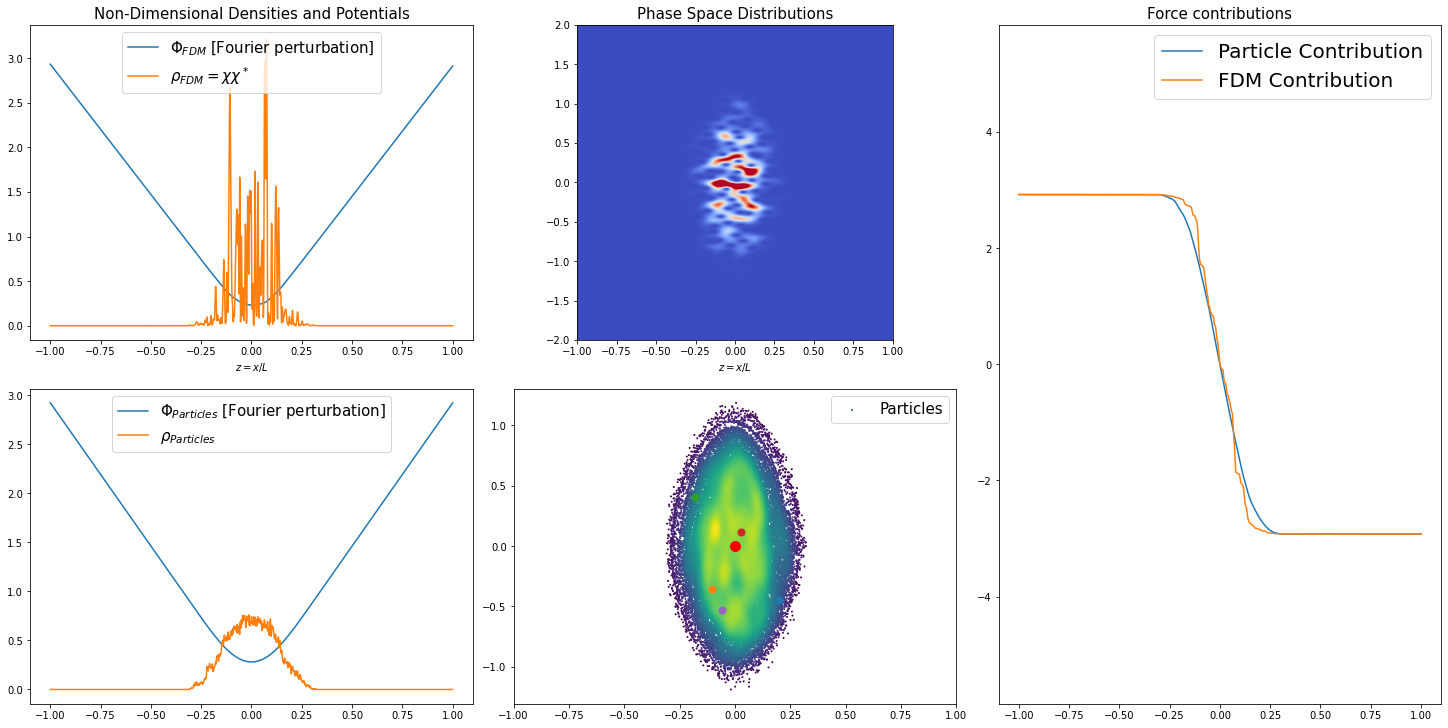

sum chi^2 = 363.5327611131392


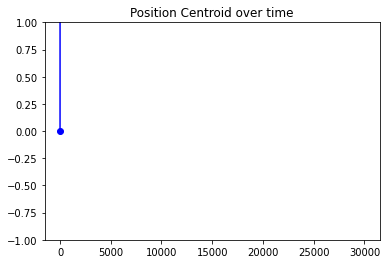

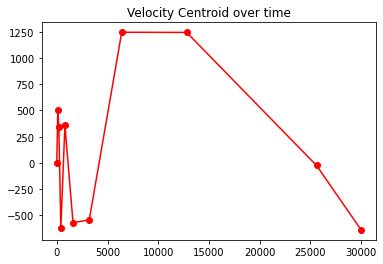

1002528.0
0.000362872333466239


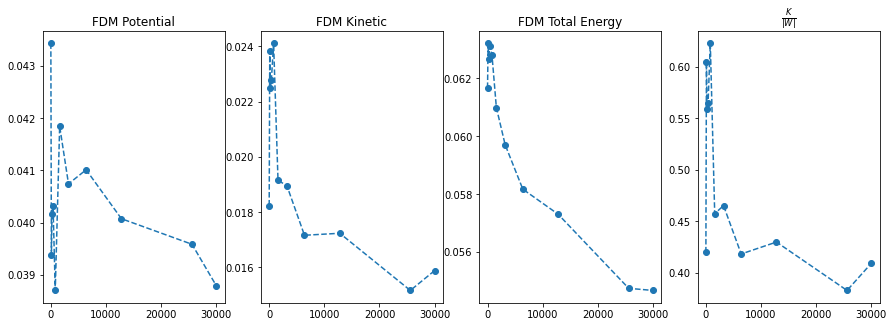

1.0


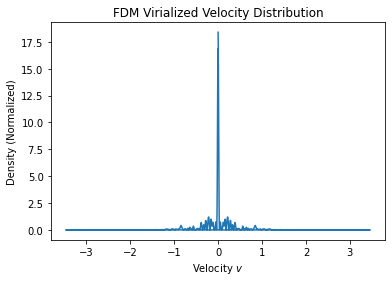

0.003347687674871195


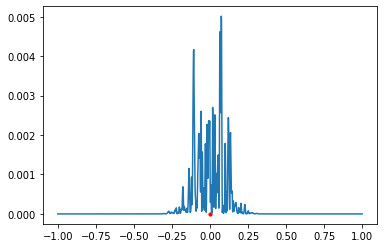

z_rms = 0.06327430385282103
v_rms = 0.13913748250873623


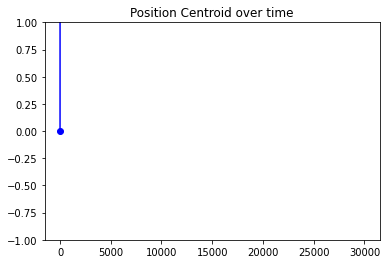

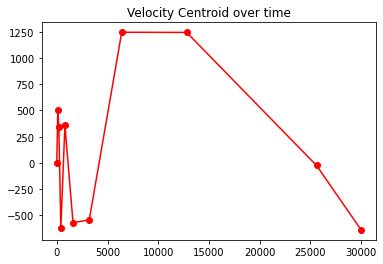

v_rms = 0.45994454555073044
z_rms = 0.11665236556743665
K_avg = 0.5*m*v_rms^2 = 4.921747024923916e-07 (m=4.653056619813859e-06)
=> 2*K_avg = 9.843494049847833e-07
W_avg = 5832.618278371832
---------Now Different Routine---------
K_tot = 0.024608735124619665
K_avg = 4.921747024923933e-07
W_tot = -0.06533447798603187
W_avg = -1.3066895597206375e-06


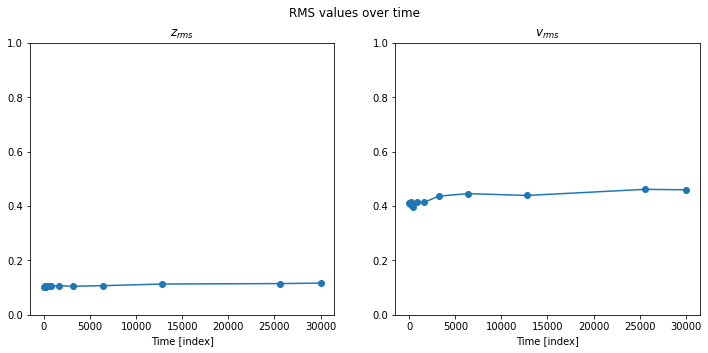

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:109: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


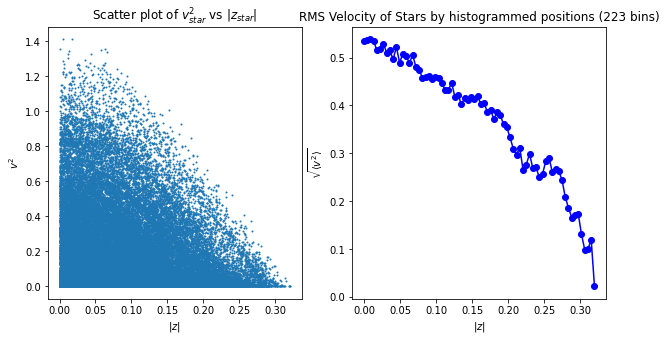

['False', 0.0, 4.653056619813859e-06, 0.0]


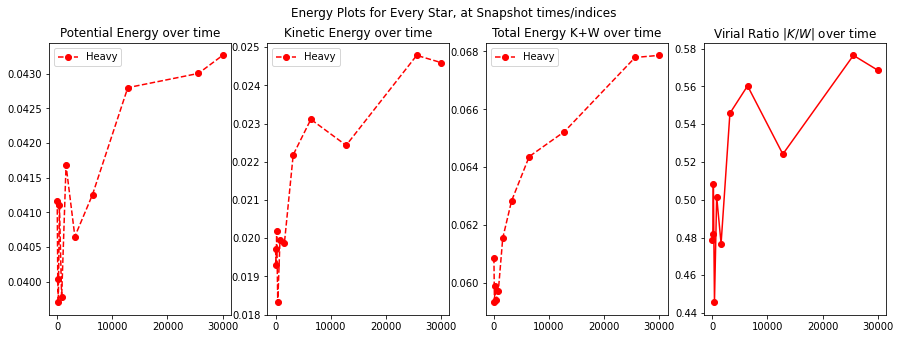

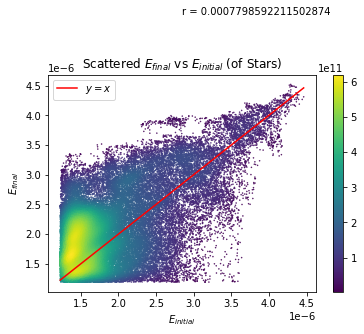

Net change in Energy (of all stars)= 0.00909835286522253
Net change in Energy = 0.00909835286522253


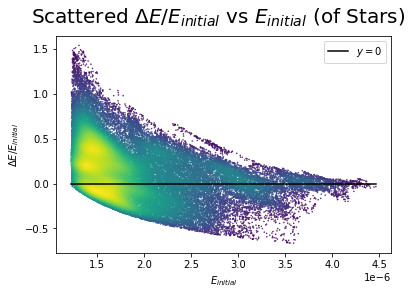

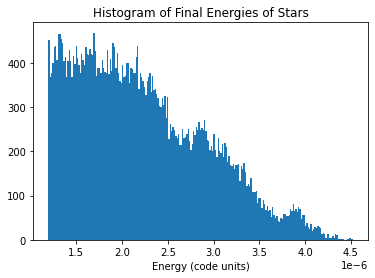

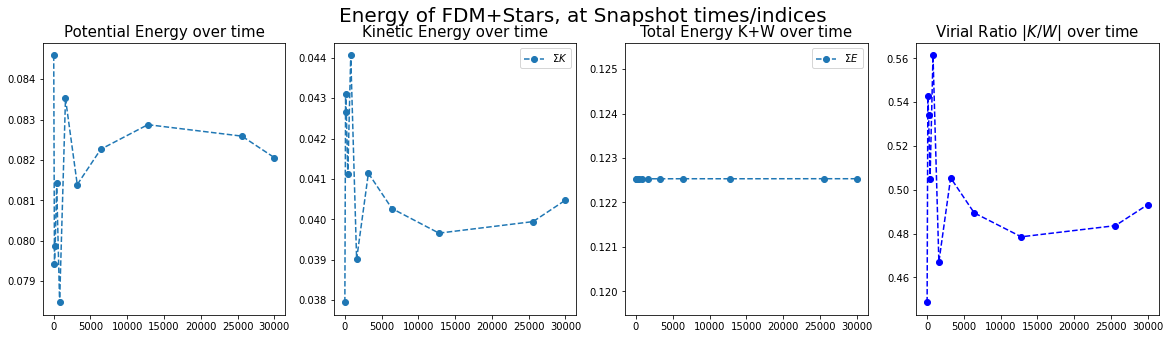

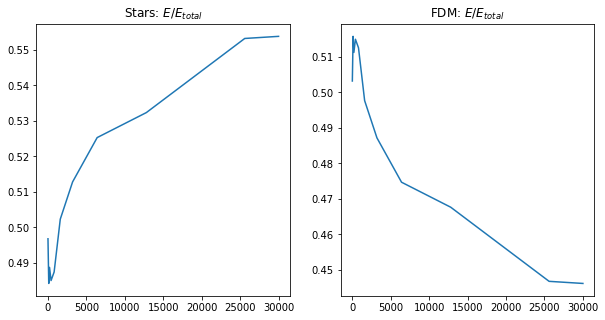

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.0007798592211502874_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.00015597184423005747_Snapshots
[['Time Elapsed:' '10726.405927181244']
 ['Box Length:' '2.0']
 ['Boson Mass:' '3205.706789377339']
 ['Number of bosons:' '0.00015597184423005747']
 ['Particle mass(es):' '4.632983923412346e-06']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '4.632983923412346e-06']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.00015597184423005747']
 ['Grid Points:' '6888']
 ['Snapshot Indices:'
  '[    0   100   200   400   800  1600  3200  6400 12800 25600 30000]']]
[0.0, 100.0, 200.0, 400.0, 800.0, 1600.0, 3200.0, 6400.0, 12800.0, 25600.0, 30000.0]
r=0.00015597184423005747,Num_stars = 50000.0


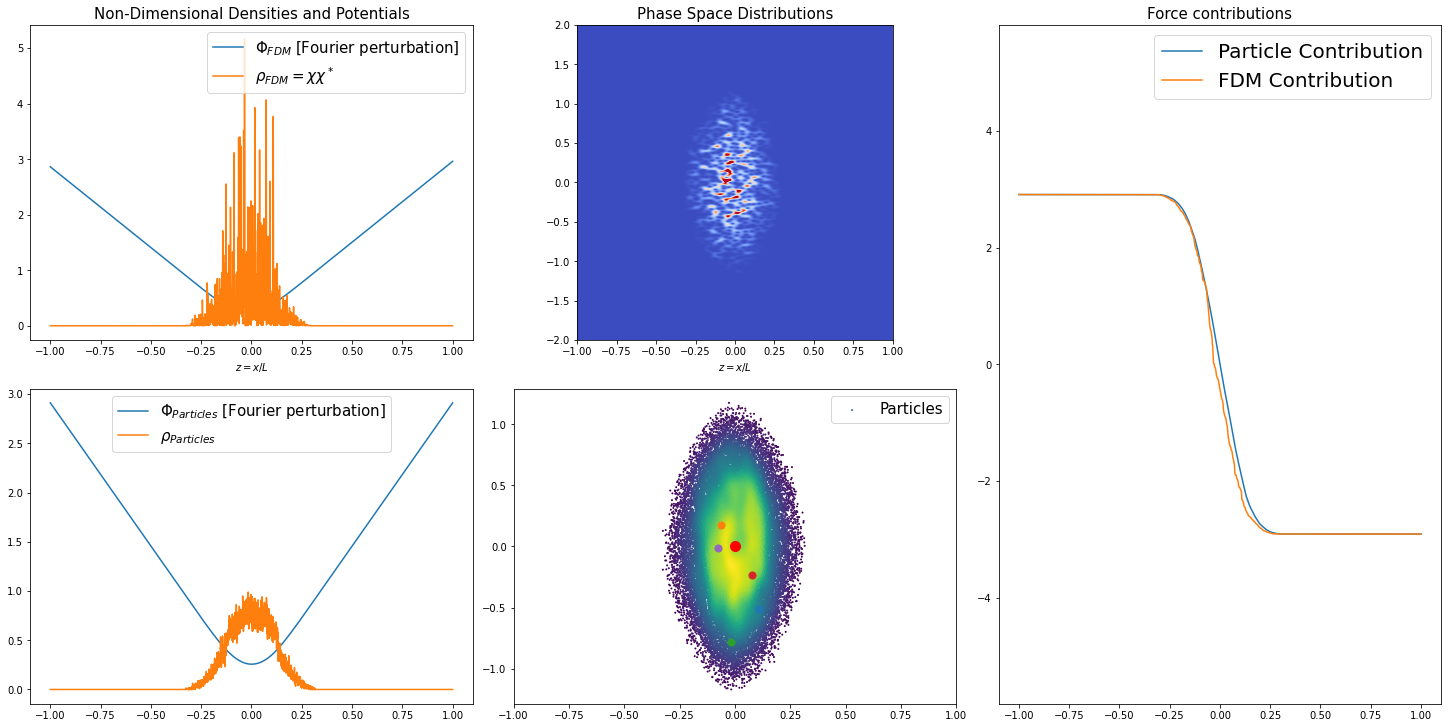

sum chi^2 = 1713.9589953115774


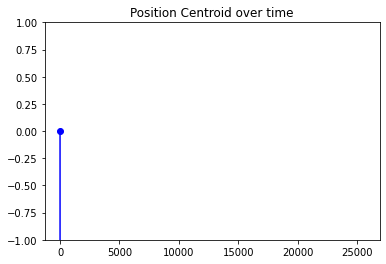

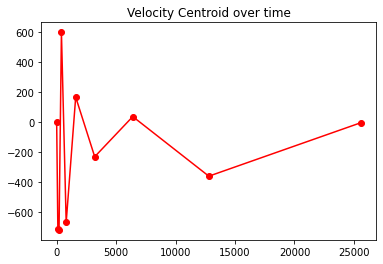

23722272.0
7.226153818863377e-05


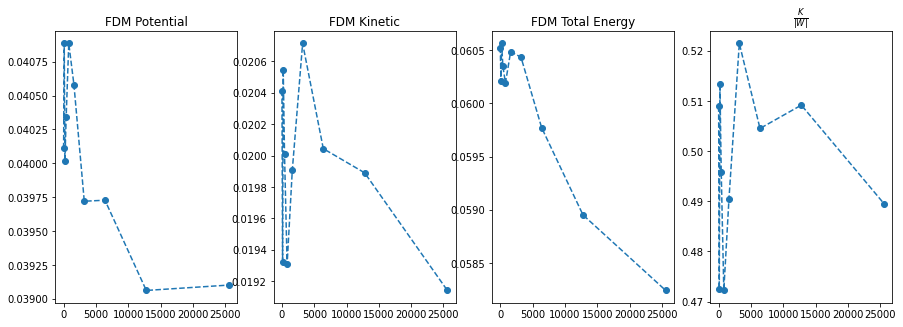

1.0


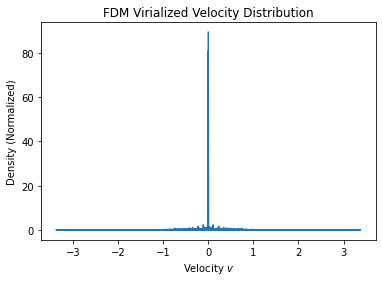

-0.016944238337206326


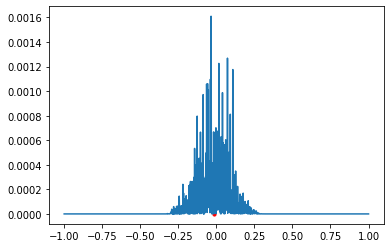

z_rms = 0.09010310187937892
v_rms = 0.14761245485394958


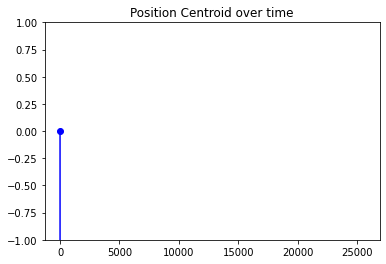

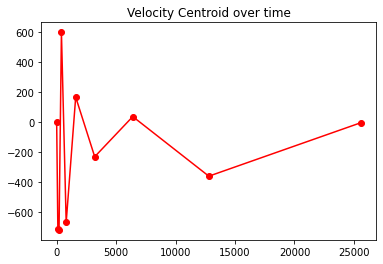

v_rms = 0.42887077160826176
z_rms = 0.10800416788208735
K_avg = 0.5*m*v_rms^2 = 4.260726879064004e-07 (m=4.632983923412346e-06)
=> 2*K_avg = 8.521453758128008e-07
W_avg = 5400.2083941043675
---------Now Different Routine---------
K_tot = 0.02130363439532016
K_avg = 4.260726879064032e-07
W_tot = -0.05946293662803557
W_avg = -1.1892587325607115e-06


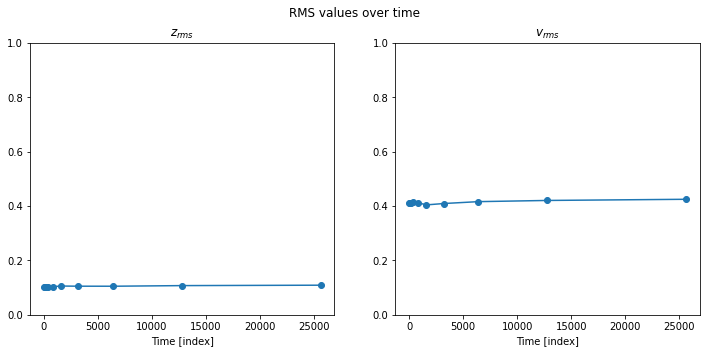

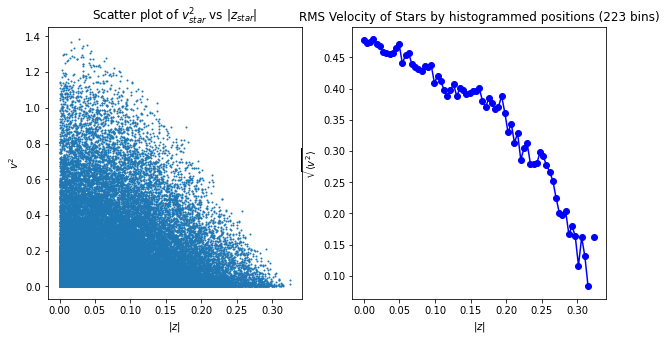

['False', 0.0, 4.632983923412346e-06, 0.0]


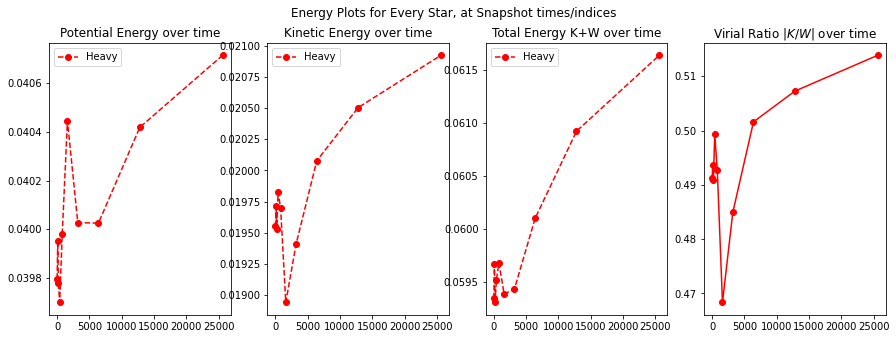

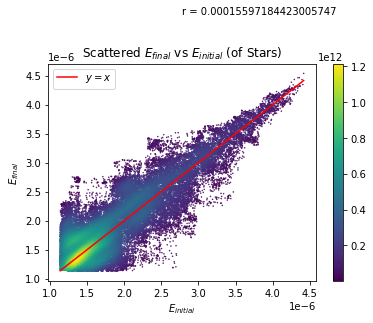

Net change in Energy (of all stars)= 0.0032039012735300874
Net change in Energy = 0.0032039012735300874


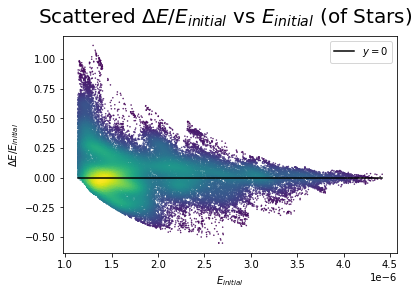

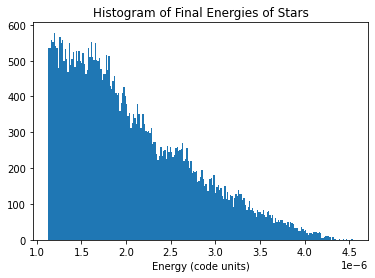

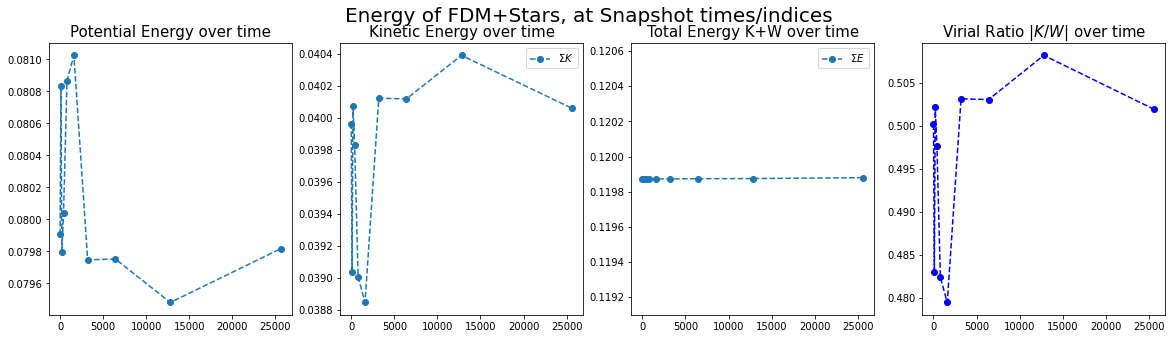

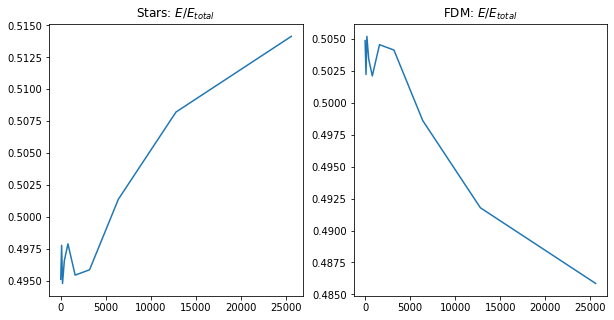

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.00015597184423005747_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.0015597184423005747_Snapshots
[['Time Elapsed:' '7347.5758497715']
 ['Box Length:' '2.0']
 ['Boson Mass:' '320.57067893773393']
 ['Number of bosons:' '0.0015597184423005747']
 ['Particle mass(es):' '4.6775112358207435e-06']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '4.6775112358207435e-06']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.0015597184423005747']
 ['Grid Points:' '720']
 ['Snapshot Indices:'
  '[    0   100   200   400   800  1600  3200  6400 12800 25600 30000]']]
[0.0, 100.0, 200.0, 400.0, 800.0, 1600.0, 3200.0, 6400.0, 12800.0, 25600.0, 30000.0]
r=0.0015597184423005747,Num_stars = 50000.0


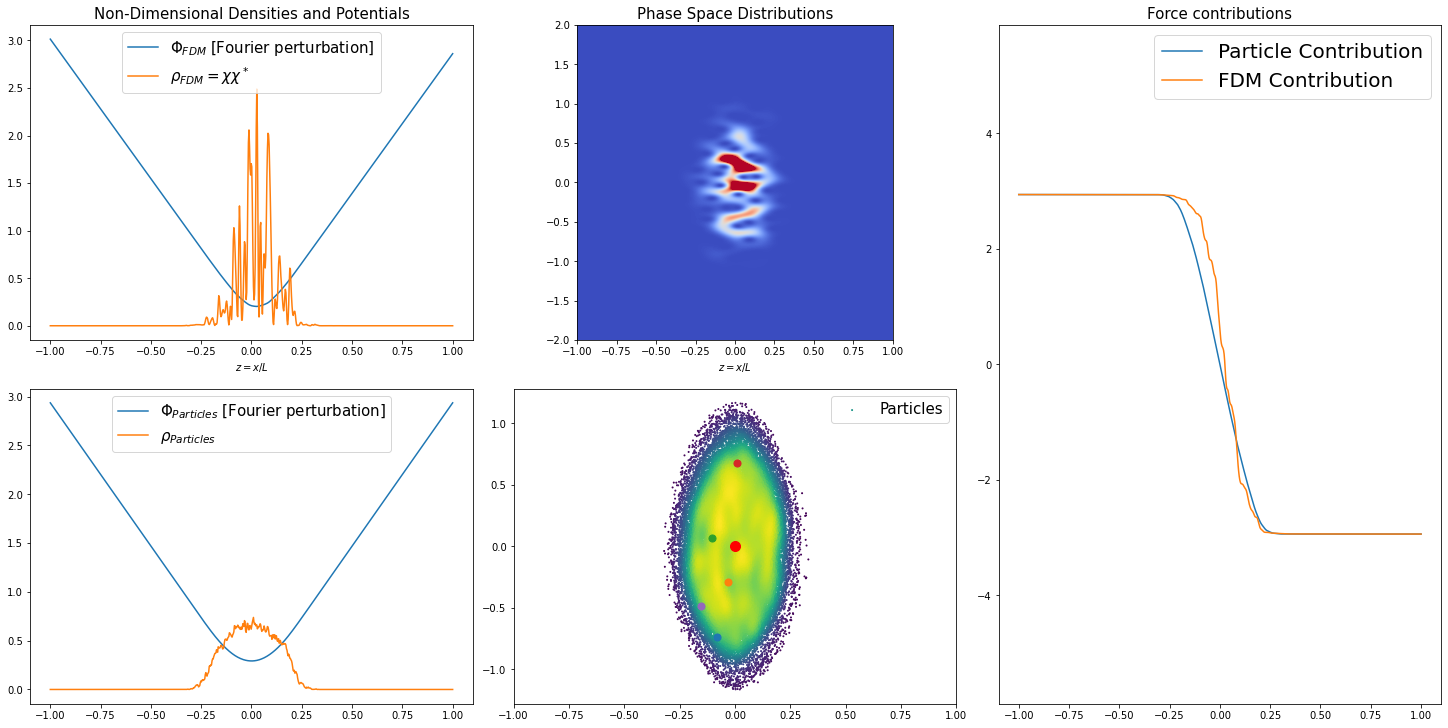

sum chi^2 = 188.83899185334542


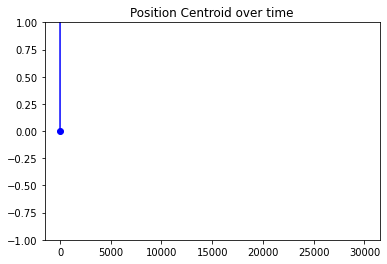

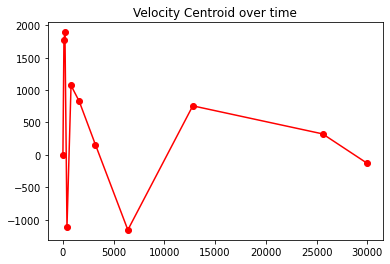

259200.0
0.0007295587693298728


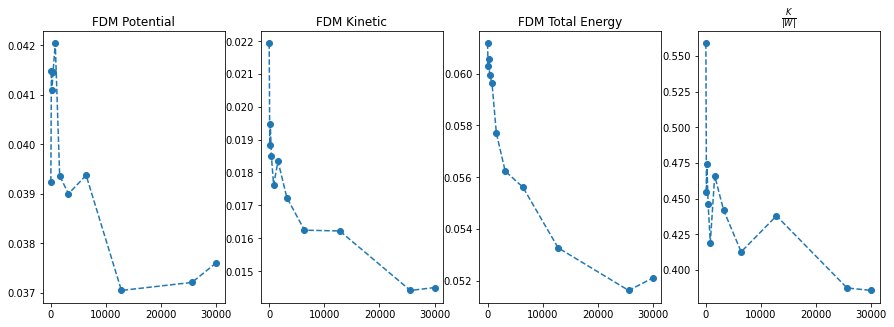

1.0


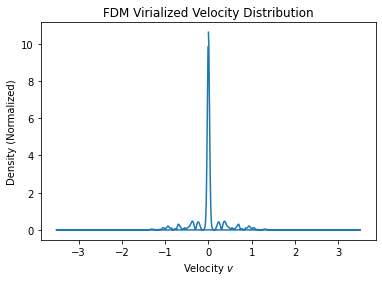

0.026043635582588657


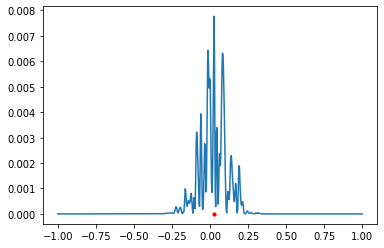

z_rms = 0.039321577295162016
v_rms = 0.13324494089785688


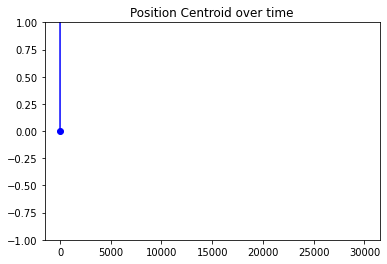

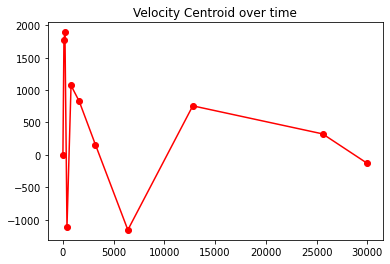

v_rms = 0.46256438828939433
z_rms = 0.11887358974287834
K_avg = 0.5*m*v_rms^2 = 5.004137479278072e-07 (m=4.6775112358207435e-06)
=> 2*K_avg = 1.0008274958556144e-06
W_avg = 5943.679487143917
---------Now Different Routine---------
K_tot = 0.025020687396390344
K_avg = 5.004137479278069e-07
W_tot = -0.06833354130792488
W_avg = -1.3666708261584975e-06


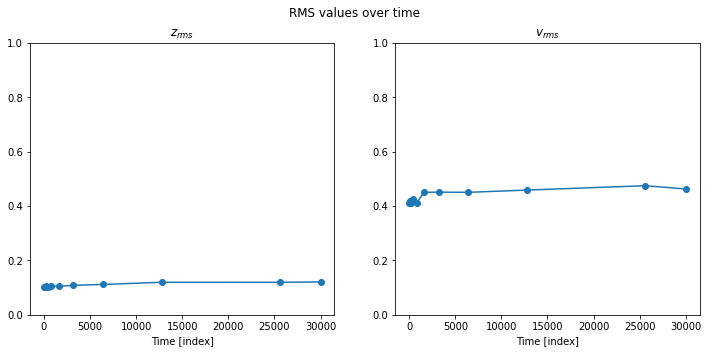

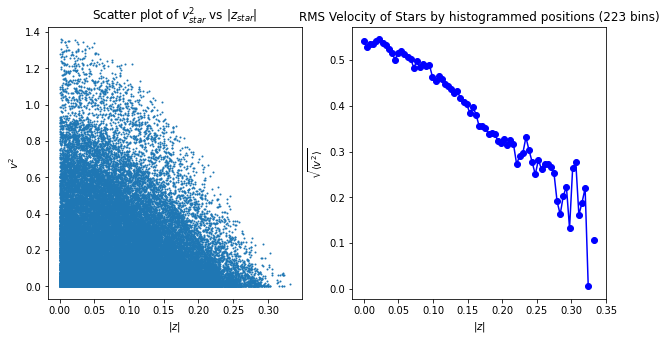

['False', 0.0, 4.6775112358207435e-06, 0.0]


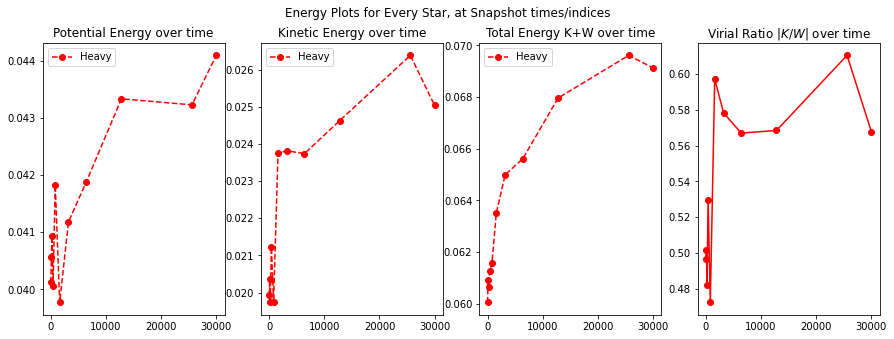

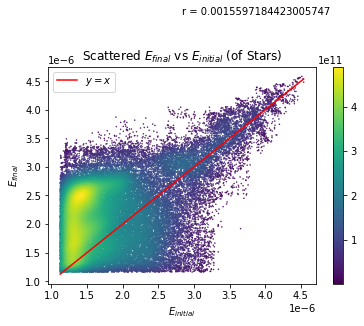

Net change in Energy (of all stars)= 0.013039373170431629
Net change in Energy = 0.013039373170431629


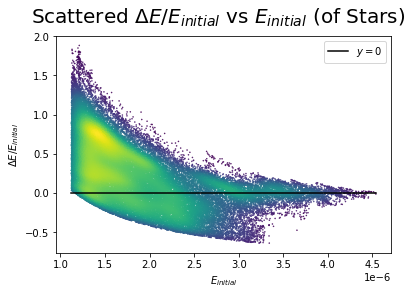

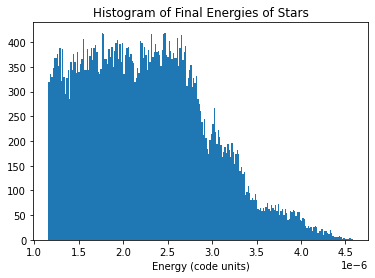

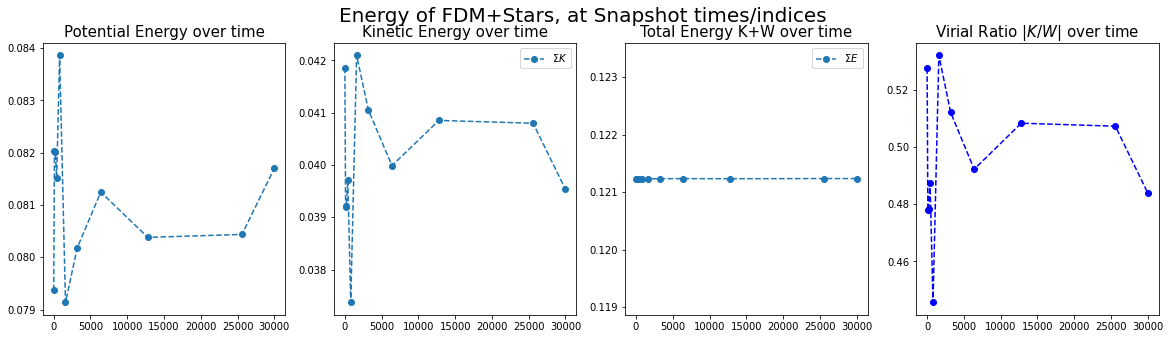

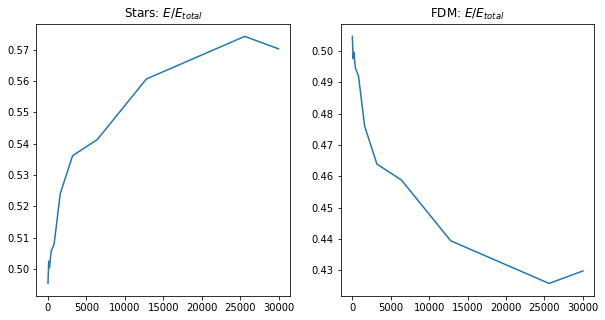

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/Full/FDM0.5_r0.0015597184423005747_Snapshots


In [10]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/Full" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
deltaE_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, deltaE, Num_stars, FDM_z_rms, FDM_v_rms, z_rms,v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    deltaE_s.append(deltaE)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

In [ ]:
import numpy as np

data = np.array([[r,E] for r,E in zip(r_s,deltaE_s)])
data.sort(axis=0)
r = data[:,0]
E = data[:,1]
plt.plot(r,E,"o--")
plt.show()

# Calculate $v_{rms}$ and $R_{syst}$ 

Want to verify
$$\langle v^2 \rangle = \frac{GM}{R_{syst}}$$

In [ ]:
v_rms = np.sqrt(np.mean([star.v**2 for star in stars]))
z_rms = np.sqrt(np.mean([star.x**2 for star in stars]))
print(f"v_rms = {v_rms}")
print(z_rms)
#v_rms = np.sqrt(np.sum([star.v**2 for star in stars])/Num_stars)

K = 0.5 * v_rms**2
print(f"K_avg = 0.5*m*v_rms^2 = {K} (m=1)")
print(F"=> 2*K_avg = {2*K}")

print(z_rms*Num_stars)

print("-----------------------")




R_syst = Num_stars / v_rms**2
print(R_syst)



rho_0 = np.mean(rho_part)
print(4*rho_0*z_rms)

print(v_rms**2 / (2*np.pi*z_rms))

print(16*np.pi*rho_0**2*z_rms**3 / Num_stars)


In [ ]:
plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))

In [ ]:

phi_part = phi_part - (np.max(phi_part)-np.max(-Num_stars/np.abs(z)))

plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))
plt.show()

# Compute total KE of stars:
K = 0
for star in stars:
    dK = 0.5*star.v**2
    K += dK
print(K)
#average KE:
print(K/Num_stars)

#Compute Total Potential
W = 0
for star in stars:
    #g = NB.g(star,a_part,dz)
    i = int(star.x//dz)
    rem = star.x % dz 

    if i != len(phi_part)-1:
        value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
    elif i == len(phi_part)-1:
        # then i+1 <=> 0
        value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
    phi_star = value
    dW = phi_star
    W += dW
print(W)
#average W:
print(W/Num_stars)

In [ ]:
def f(z,*p):
    u_0 = p[0]
    z_0 = p[1]
    return u_0 / np.cosh(0.5*z/z_0)**2

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,grid_counts,p0 = guess)
plt.plot(z,grid_counts)
plt.plot(z,f(z,*popt))
plt.show()

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,f(z,*popt))
plt.show()

def g(z,*p):
    return p[0]*np.exp(-z**2 / p[1])

guess = [-rho_0,z_0]
popt,pcov = opt.curve_fit(g,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,g(z,*popt))
plt.show()

